# Bank Reviews Analytic

This notebook shows the usage of the bank reviews analytics pipeline.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if the 'src' directory exists in the current directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\Abenezer\Desktop\KAIM Project\bank-reviews-analytics\notebooks


## 1. Scraping Reviews

First, let's scrape some bank reviews from the Google Play Store:

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3192377
Total Ratings: 38870
Total Reviews: 8338

Abyssinia: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1726847
Total Ratings: 6366
Total Reviews: 1219

DashenBank: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.168704
Total Ratings: 3915
Total Reviews: 773

App information saved to ../data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:05<00:11,  5.83s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:16<00:08,  8.57s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:21<00:00,  7.15s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Bank of Abyssinia: 400
  Dashen Bank: 400

Data saved to: ../data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: CBE ይለያል።...
Date: 2025-11-29 17:22:32

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 15:54:14

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 20:18:20

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very smart App easy to use and friendly...
Date: 2025-11-29 16:22:04

Rating: ⭐⭐⭐⭐⭐
Review: Very exemplery App to other Bank Aps !...
Date: 20

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## 2. Loading and Preprocessing Data

Next, let's load and preprocess the review data:

In [3]:
# Initialize preprocessor
preprocessor = ReviewPreprocessor()


success = preprocessor.process()
print("Data preprocessing completed!")



STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 277 (23.08%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[Amharic Filter] Dropping reviews with Amharic text...
Removed 47 reviews containing Amharic text

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 921 reviews

Saving processed data...
Data saved to: ../data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 921

Data retention rate: 76.75%
Data error rate: 23.25%
⚠ Data quality: NEEDS ATTENTION (>10% errors)

Reviews per bank:
  Bank of Abyssinia: 318
  Commercial Bank of Ethiopia: 308
  Dashen Bank: 295

Rating distribution:
  ⭐⭐⭐⭐⭐: 521 (56.6%)
  ⭐⭐⭐⭐: 62

C:\Users\Abenezer\AppData\Local\Temp\ipykernel_25492\4216370820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_df, x='rating', palette='viridis')


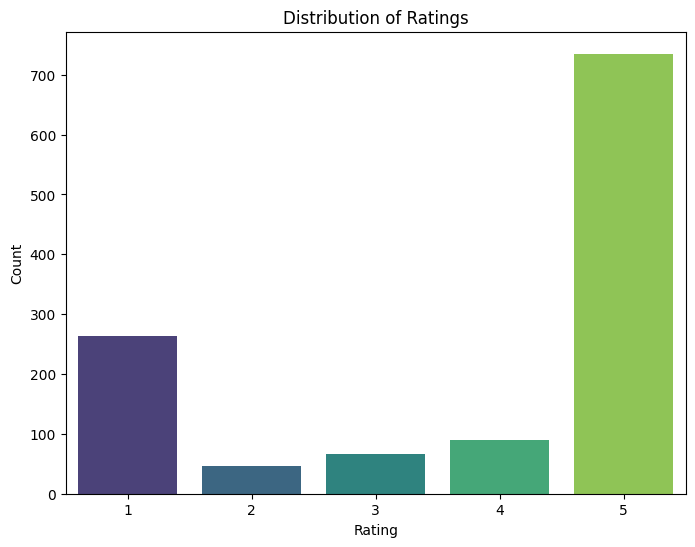

C:\Users\Abenezer\AppData\Local\Temp\ipykernel_25492\4216370820.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


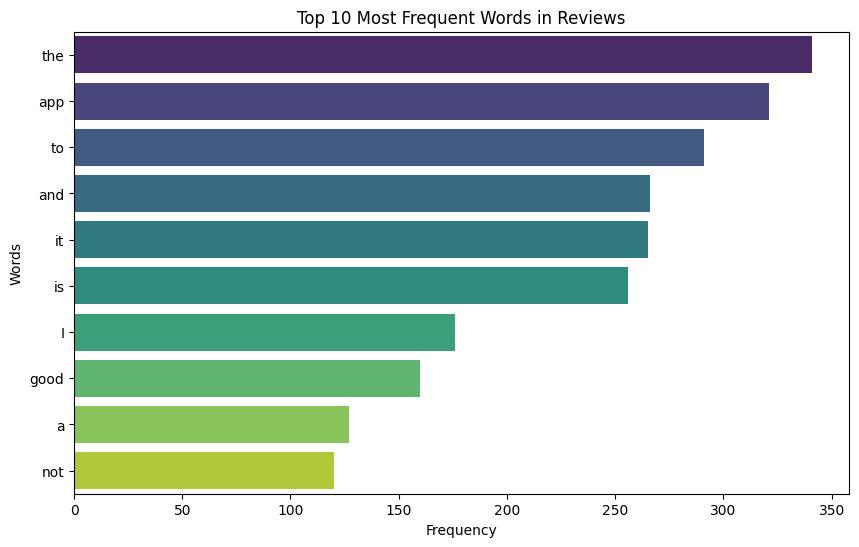

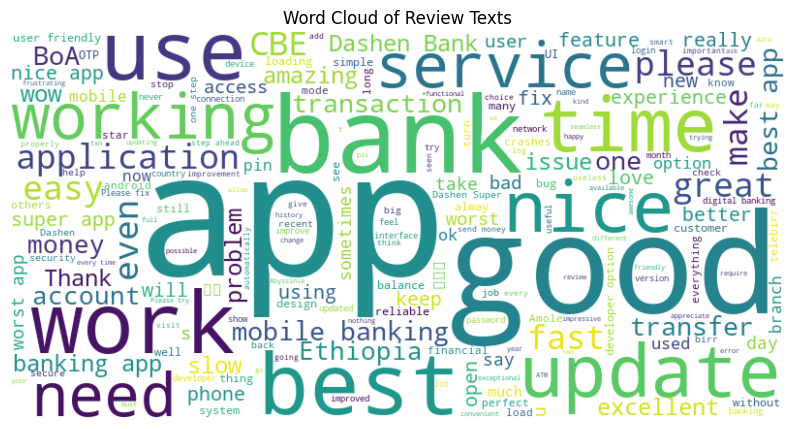

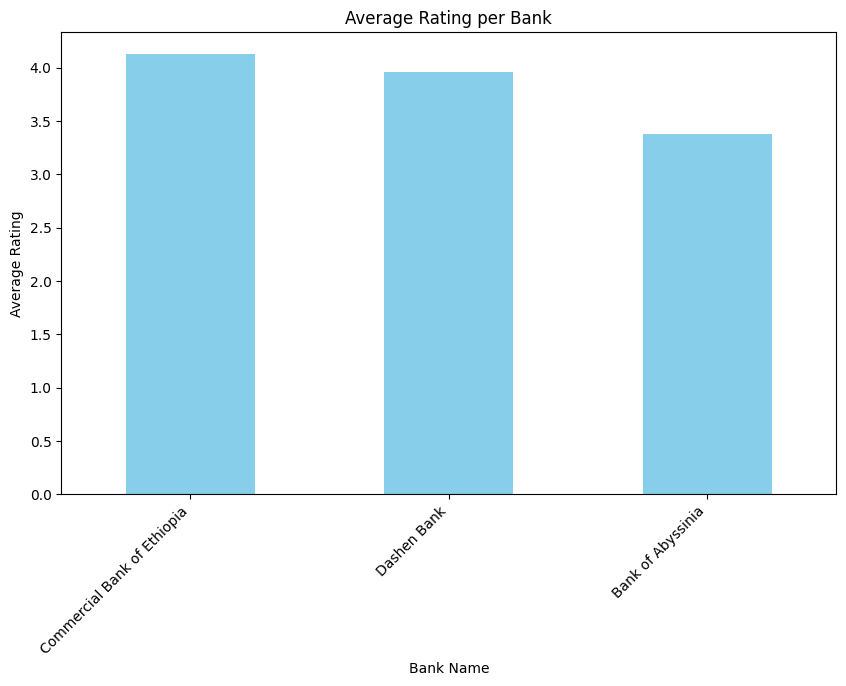

In [4]:
from collections import Counter
from wordcloud import WordCloud

# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=raw_df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 Most Frequent Words in Reviews

# Combine all review texts
all_reviews = ' '.join(raw_df['review_text'].dropna().astype(str))

# Generate word frequencies
word_counts = Counter(all_reviews.split())
most_common_words = word_counts.most_common(10)

# Bar plot for most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 10 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Word Cloud of Review Texts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()

# Average Rating per Bank
plt.figure(figsize=(10, 6))
avg_rating_per_bank = raw_df.groupby('bank_name')['rating'].mean().sort_values(ascending=False)
avg_rating_per_bank.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Bank')
plt.xlabel('Bank Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()